<a href="https://colab.research.google.com/github/Sanika-Nimse/loan-amount-prediction/blob/main/loan_mount_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [3]:
df_train=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df_test=pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

In [4]:
df_train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
184,LP001639,Female,Yes,0,Graduate,No,3625,0.0,108.0,360.0,1.0,Semiurban,Y
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
521,LP002690,Male,No,0,Graduate,No,2500,0.0,55.0,360.0,1.0,Semiurban,Y


In [5]:
df_test.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
184,LP002045,Male,Yes,3+,Graduate,No,10166,750,150.0,NaN,1.0,Urban
171,LP001973,Male,Yes,2,Not Graduate,No,4483,0,130.0,360.0,1.0,Rural
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
154,LP001855,Male,Yes,2,Graduate,No,4855,0,72.0,360.0,1.0,Rural
225,LP002257,Female,No,0,Graduate,No,2545,0,74.0,360.0,1.0,Urban


In [6]:
df_train.drop(columns='Loan_ID',inplace=True)
df_test.drop(columns='Loan_ID',inplace=True)

In [7]:
print(df_train.shape)
print(df_test.shape)

(614, 12)
(367, 11)


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [10]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

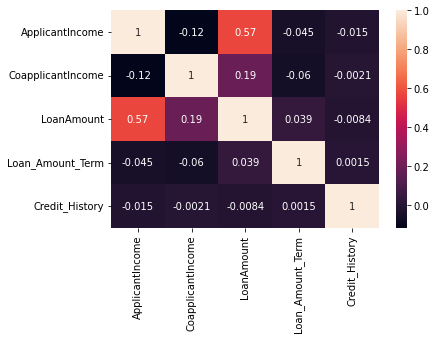

In [13]:
sns.heatmap(df_train.corr(),annot=True)

In [14]:
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


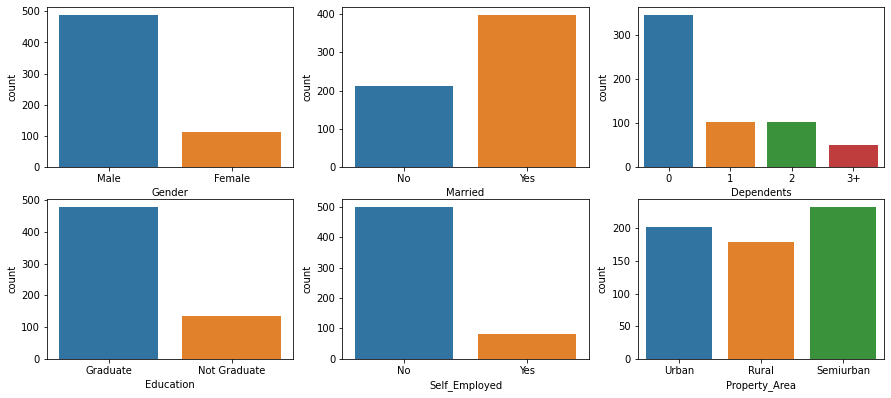

In [15]:
plt.figure(figsize=(15,10))
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(data=df_train,x=i[1])
    print(df_train[i[1]].value_counts())

<AxesSubplot:xlabel='Property_Area'>

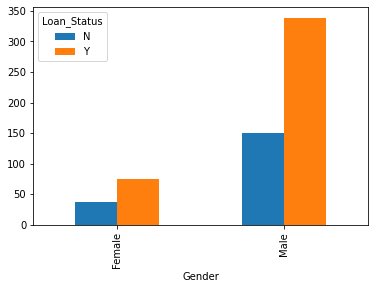

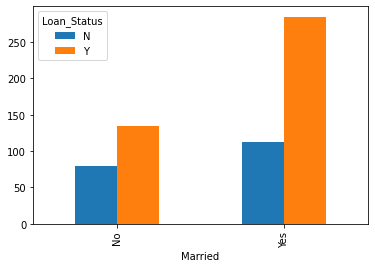

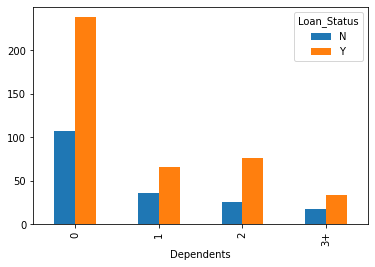

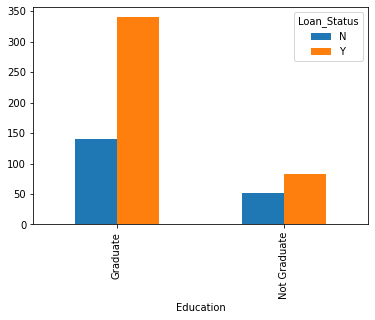

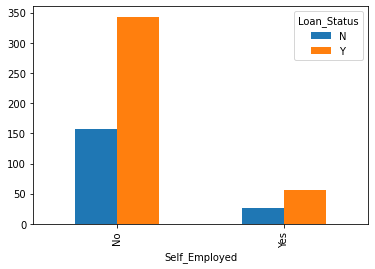

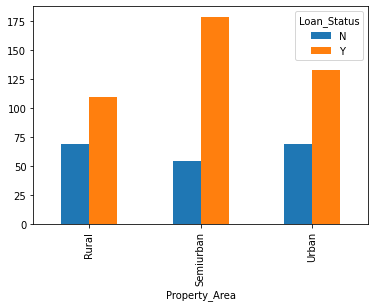

In [16]:
pd.crosstab(df_train.Gender,df_train.Loan_Status).plot(kind="bar")
pd.crosstab(df_train.Married,df_train.Loan_Status).plot(kind="bar")
pd.crosstab(df_train.Dependents,df_train.Loan_Status).plot(kind="bar")
pd.crosstab(df_train.Education,df_train.Loan_Status).plot(kind="bar")
pd.crosstab(df_train.Self_Employed,df_train.Loan_Status).plot(kind="bar")
pd.crosstab(df_train.Property_Area,df_train.Loan_Status).plot(kind="bar")

In [17]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

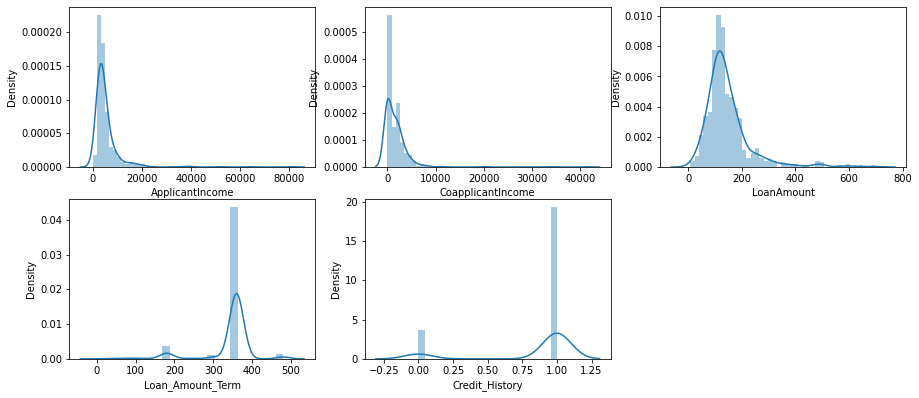

In [18]:
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df_train[i[1]])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

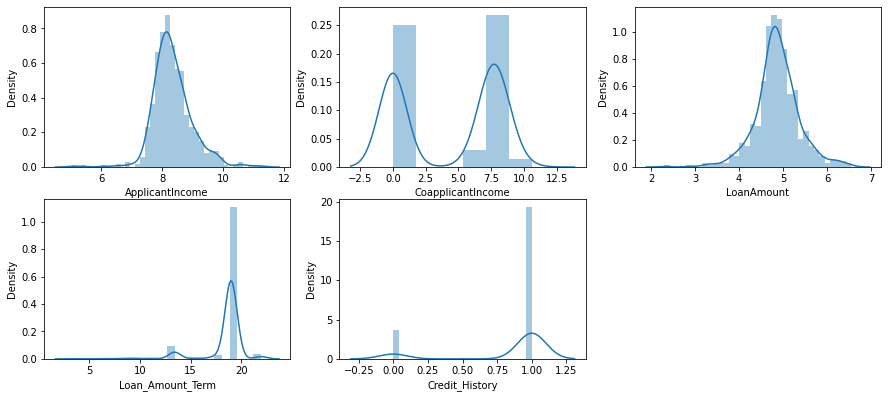

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.distplot(np.log1p(df_train['ApplicantIncome']))
plt.subplot(3,3,2)
sns.distplot(np.log1p(df_train['CoapplicantIncome']))
plt.subplot(3,3,3)
sns.distplot(np.log1p(df_train['LoanAmount']))
plt.subplot(3,3,4)
sns.distplot(np.sqrt(df_train['Loan_Amount_Term']))
plt.subplot(3,3,5)
sns.distplot(np.sqrt(df_train['Credit_History']))

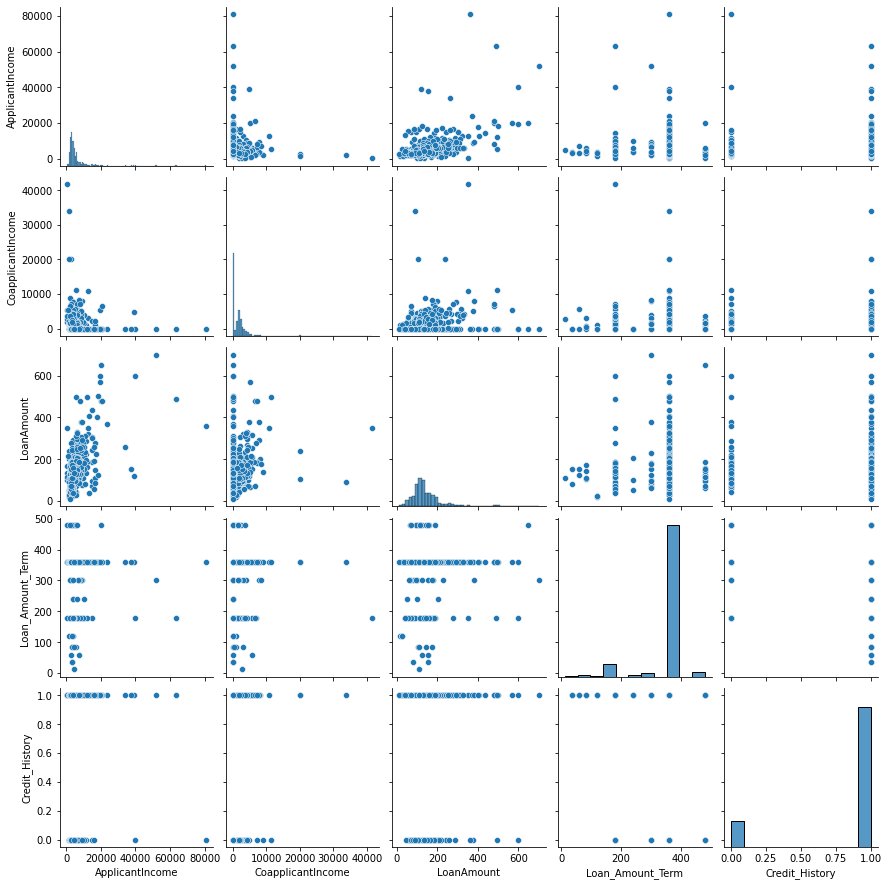

In [20]:
sns.pairplot(df_train)

In [21]:
df_train['Loan_Status'].replace({'N':0,'Y':1},inplace=True)

In [22]:
x=df_train.drop(columns='Loan_Status')
y=df_train['Loan_Status']

In [23]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [24]:
y


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0,shuffle=True)

In [26]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(429, 11)
(185, 11)
(429,)
(185,)


In [27]:
cols=xtrain.columns

In [28]:
cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [30]:
numeric_cols = [col for col in xtrain.columns if xtrain[col].dtype in ['int64', 'float64']]
categoric_cols = [col for col in xtrain.columns if xtrain[col].dtype=='object']

In [31]:
numeric_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [32]:
categoric_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [33]:
num_transformer = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                                  ('scaler', StandardScaler())
                                 ])

cat_transformer = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                                  ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
                                 ])

In [34]:
pipe=ColumnTransformer(transformers=[('num', num_transformer, numeric_cols),
                                     ('cat', cat_transformer,categoric_cols)])

In [35]:
pipe

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term',
                                  'Credit_History']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Education', 'Self_Employed',
                                  'Property_Area'])])

In [36]:
def predict_train(pipeline,xtrain,ytrain,xtest,ytest):
    pipeline.fit(xtrain,ytrain)
    y_pred=pipeline.predict(xtest)
    print("ACCURACY_SCORE:-",accuracy_score(ytest,y_pred))
    print("CLASSIFICATION_REPORT\n",classification_report(ytest,y_pred))
    print('CROSS_VAL_SCORE:-')
    scores = cross_val_score(pipeline, x, y, cv=5, scoring='accuracy')
    print(scores)
    print('MEAN_SCORE:-', scores.mean())

In [37]:
logr= LogisticRegression(max_iter=100)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(max_depth=10)
knn = KNeighborsClassifier(n_neighbors=100)
gnb = GaussianNB()
sgd = SGDClassifier()
svm = SVC()
xgb = XGBClassifier(n_estimators=100,max_depth=10)

In [38]:
models=[logr,dtc,rfc,knn,gnb,sgd,svm,xgb]

In [39]:
for model in models:
    print(model,"\n")
    final_pipeline=Pipeline(steps=[('pipe',pipe),
                                   ('model',model)
                                  ])
    predict_train(final_pipeline,xtrain,ytrain,xtest,ytest)
    print("-------"*43)

LogisticRegression() 

ACCURACY_SCORE:- 0.8378378378378378
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.92      0.45      0.61        51
           1       0.82      0.99      0.90       134

    accuracy                           0.84       185
   macro avg       0.87      0.72      0.75       185
weighted avg       0.85      0.84      0.82       185

CROSS_VAL_SCORE:-
[0.80487805 0.7804878  0.7804878  0.85365854 0.81967213]
MEAN_SCORE:- 0.8078368652538984
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier() 

ACCURACY_SCORE:- 0.7081081081081081
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.48      0.57      0.